In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import palettable

import sys
sys.path.append('..')
from lib import *

plt.style.use('../custom.mplstyle')

In [2]:
theta_c = 1e2
b0 = 1e4
d = 1
tstart = 1e-3
tend = 4.0
C0 = 20
gamma = theta_c*C0/b0
Ninfty = (b0 + theta_c*C0)/d
print(gamma, Ninfty)

0.2 12000.0


In [3]:
def growthlaw(T, d, t0, gamma):
    return (d * (-T + t0) + np.log((-1 + np.exp(d * T))/(-1 + np.exp(d * t0)))/(1 + gamma))

In [4]:
def repertoiresize_K(t, d, K):
    def func(t, N):
        return (b0/(K+N)-d)*N + theta_c * C0
    repsize = scipy.integrate.odeint(func, 0.0, t, tfirst=True).flatten()
    return repsize/Ninfty

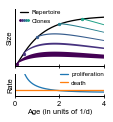

In [7]:
t = np.linspace(tstart, tend, 1000)
fig, axes = plt.subplots(figsize=(1.6, 1.6), nrows=2, sharex=True, gridspec_kw=dict(height_ratios=[2.5, 1]))

ax = axes[1]
ax.plot(t, b0/((b0 + theta_c*C0)*(1-np.exp(-d*t))/d), label='proliferation')
ax.plot(t, d*np.ones_like(t), label='death')
ax.set_ylabel('Rate')
ax.legend(loc='upper right', borderpad=0.0, borderaxespad=0.0, bbox_to_anchor=(1.0, 1.1))
ax.set_ylim(0.5, 2.3)
ax.set_xlabel('Age (in units of 1/d)')

K = 20*C0

ax = axes[0]
rep, = ax.plot(t, repertoiresize_K(t, d, K), color='k', zorder=-1)
colors = palettable.matplotlib.Viridis_8.mpl_colors
lines = []
for i, tclone in enumerate([0.1, 0.4, 1.0, 2.0, 3.0]):
    tnew = np.linspace(tclone, tend, 1000)
    size = 13*C0*np.exp(growthlaw(tnew, d, tclone, gamma))/Ninfty
    mask = size>0
    y = repertoiresize_K([0.0, tclone], d, K)[1]*np.exp(growthlaw(tnew, d, tclone, gamma))
    l, = ax.plot([tclone], y[0], '-o', color=colors[i])
    lines.append(l)
    ax.fill_between(tnew[mask], y[mask], y[mask]+size[mask], facecolor=colors[i])
ax.set_ylabel('Size')
ax.set_xlim(0.0, tend)
ax.set_ylim(0.0, 1.1)
ax.legend([rep, tuple(lines)], ['Repertoire', 'Clones'],
          handler_map={tuple:matplotlib.legend_handler.HandlerTuple(ndivide=None)},
          loc='upper left', bbox_to_anchor=(0.0, 1.1))
for ax in axes:
    ax.set_yticks([])
fig.savefig(figure_directory+'model_growthillustration.svg')